In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras import optimizers
%matplotlib inline
from tensorflow.keras.layers import BatchNormalization



In [2]:
DATASET1="C:\\Users\\NADEEM CHAUDHARY\\Desktop\\ML project\\tomato\\New Plant Diseases Dataset(Augmented)\\train"
DATASET2="C:\\Users\\NADEEM CHAUDHARY\\Desktop\\ML project\\tomato\\New Plant Diseases Dataset(Augmented)\\test"

In [3]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

In [4]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET1,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [5]:
test_data=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [6]:
print(len(train_data))
print(len(test_data))


18345
4585


In [7]:

import random

random.shuffle(train_data)
random.shuffle(test_data)
for lbl in train_data[:10]:
    print(lbl[1])
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

7
8
1
5
3
1
7
5
5
5


In [8]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")
        

In [9]:
import pandas as pd
df1=pd.DataFrame(Y,columns=['Diseases'])
df1


,Diseases
0,TARGET SPOT
1,MOSAIC VIRUS
2,EARLY BLIGHT
3,SEPTORIA LEAF SPOT
4,LATE BLIGHT
...,...
18340,BACTERIAL SPOT
18341,EARLY BLIGHT
18342,LATE BLIGHT
18343,MOSAIC VIRUS


In [10]:
len(X_train),len(y_train)

(18345, 18345)

In [11]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [12]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")


In [13]:
df2=pd.DataFrame(Z,columns=['Diseases'])
df2

,Diseases
0,SEPTORIA LEAF SPOT
1,MOSAIC VIRUS
2,YELLOW LEAF CURL VIRUS
3,LATE BLIGHT
4,EARLY BLIGHT
...,...
4580,EARLY BLIGHT
4581,MOSAIC VIRUS
4582,LEAF MOLD
4583,EARLY BLIGHT


In [14]:
len(X_test),len(y_test)

(4585, 4585)

In [15]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 64, 64, 3)

In [16]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

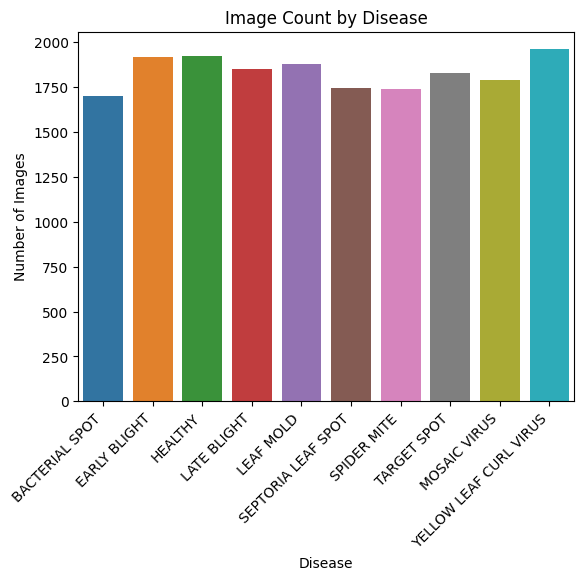

In [17]:
sns.countplot(x="Diseases", data=df1,order=order)
plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=45,ha='right')
plt.show()




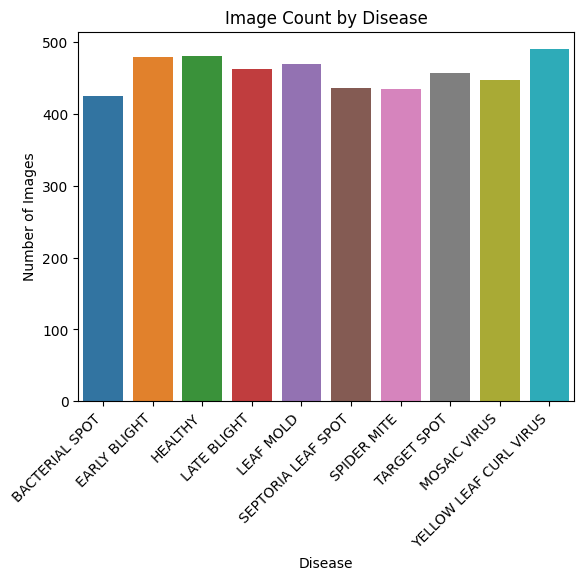

In [18]:
sns.countplot(x="Diseases", data=df2,order=order)
plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=45,ha='right')
plt.show()




In [19]:
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

one_hot_train=to_categorical(y_train)
# one_hot_train

one_hot_test=to_categorical(y_test)
# one_hot_test

classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [20]:
hist=classifier.fit(X_train,one_hot_train,epochs=75,batch_size=128,validation_split=0.2)

Epoch 1/75
115/115 [==============================] - 64s 536ms/step - loss: 1.9655 - accuracy: 0.2582 - val_loss: 1.5611 - val_accuracy: 0.4320
Epoch 2/75
115/115 [==============================] - 66s 571ms/step - loss: 1.2439 - accuracy: 0.5538 - val_loss: 0.8875 - val_accuracy: 0.6907
Epoch 3/75
115/115 [==============================] - 65s 562ms/step - loss: 0.8135 - accuracy: 0.7079 - val_loss: 0.6911 - val_accuracy: 0.7544
Epoch 4/75
115/115 [==============================] - 70s 612ms/step - loss: 0.6354 - accuracy: 0.7741 - val_loss: 0.5806 - val_accuracy: 0.7877
Epoch 5/75
115/115 [==============================] - 80s 699ms/step - loss: 0.5256 - accuracy: 0.8130 - val_loss: 0.4061 - val_accuracy: 0.8580
Epoch 6/75
115/115 [==============================] - 69s 595ms/step - loss: 0.4703 - accuracy: 0.8364 - val_loss: 0.4924 - val_accuracy: 0.8307
Epoch 7/75
115/115 [==============================] - 67s 581ms/step - loss: 0.4368 - accuracy: 0.8444 - val_loss: 0.3671 - val_ac

In [21]:
train_loss,train_acc=classifier.evaluate(X_train,one_hot_train)
train_loss,train_acc

574/574 [==============================] - 21s 36ms/step - loss: 0.0711 - accuracy: 0.9788


(0.07109278440475464, 0.9787952899932861)

In [22]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

144/144 [==============================] - 8s 52ms/step - loss: 0.2111 - accuracy: 0.9442


(0.21113330125808716, 0.9441657662391663)

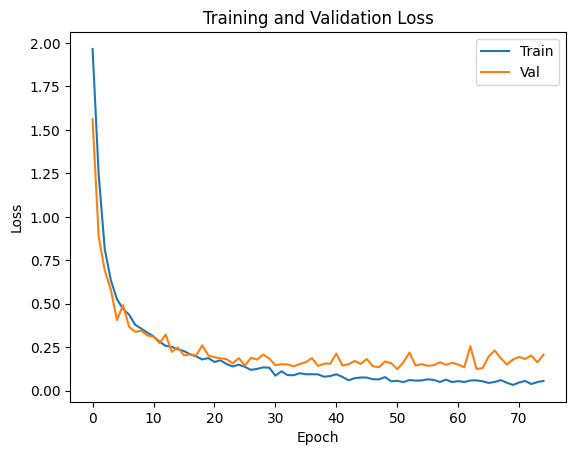

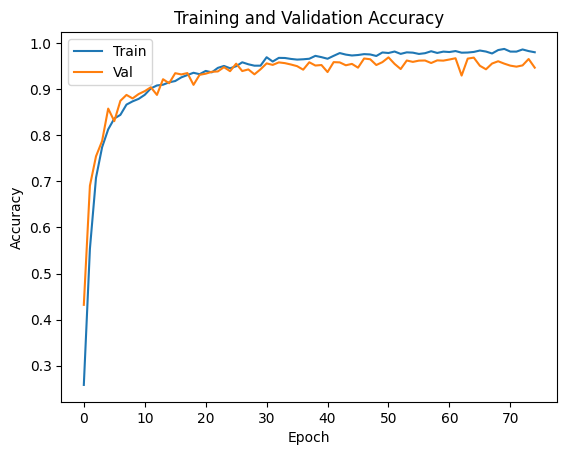

144/144 [==============================] - 5s 34ms/step


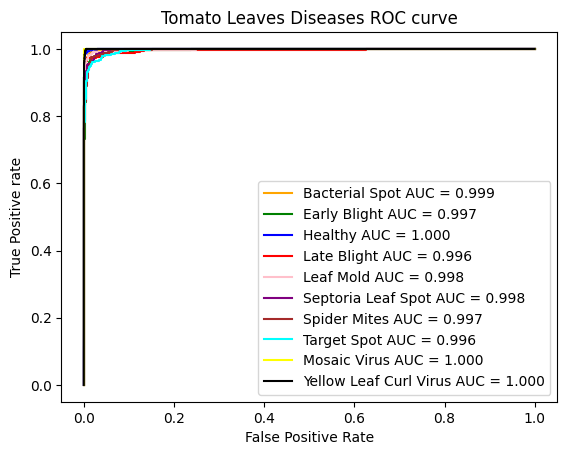

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# y_pred=classifier.predict_classes(X_test)
y_pred=np.argmax(classifier.predict(X_test), axis=-1)

# y_pred

# y_prob=classifier.predict_proba(X_test)
y_prob=classifier.predict(X_test)
# y_prob
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 10
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')




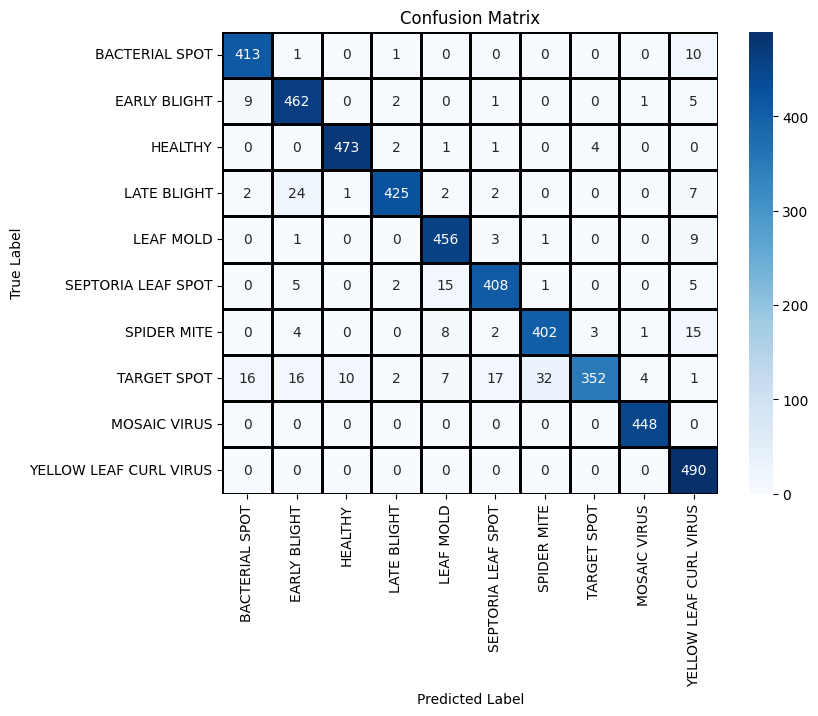

In [30]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=order, yticklabels=order,linewidths=1,linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
classifier.save("CNN.h5")

1/1 [==============================] - 0s 85ms/step
BACTERIAL SPOT---->0.00000
EARLY BLIGHT---->0.00000
HEALTHY---->0.00000
LATE BLIGHT---->0.00000
LEAF MOLD---->0.00000
SEPTORIA LEAF SPOT---->0.00000
SPIDER MITE---->0.00000
TARGET SPOT---->0.00000
MOSAIC VIRUS---->0.00000
YELLOW LEAF CURL VIRUS---->100.00000


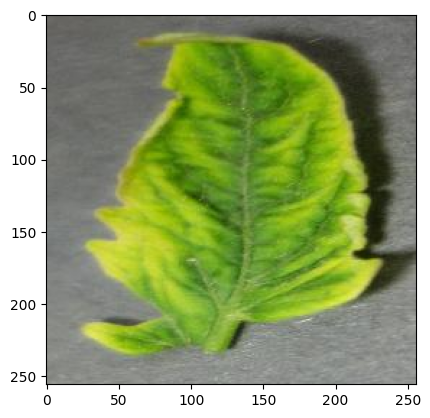

In [2]:
from numpy import loadtxt
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def load_image(filename):
    img = load_img(filename, target_size=(64, 64))
    img = img_to_array(img)
    img = img.reshape(1, 64, 64, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img
test_image = load_image("C:\\Users\\NADEEM CHAUDHARY\\Desktop\\Tomato leaf images\\11565eea-c48c-4727-b880-7c9a76fb3e35___UF.GRC_YLCV_Lab 01799.JPG")
img = mpimg.imread("C:\\Users\\NADEEM CHAUDHARY\\Desktop\\Tomato leaf images\\11565eea-c48c-4727-b880-7c9a76fb3e35___UF.GRC_YLCV_Lab 01799.JPG")
plt.imshow(img)
# load model
classifier = tf.keras.models.load_model('./CNN.h5')
classes = classifier.predict(test_image)[0]
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']
for i in range(len(order)):
    print(order[i]+"---->%2.5f" % (classes[i]*100))